In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
import os
print(os.listdir("G:/My Drive/Pendidikan/Semester 2/ML FKG"))

['heart.csv']


In [6]:
# We are reading our data
df = pd.read_csv("G:/My Drive/Pendidikan/Semester 2/ML FKG/heart.csv")

In [7]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#Data exploration
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

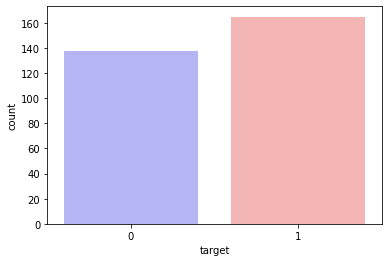

In [21]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [19]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("% Patients Haven't Heart Disease = {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("% Patients Have Heart Disease = {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

% Patients Haven't Heart Disease = 45.54%
% Patients Have Heart Disease = 54.46%


In [13]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

In [15]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


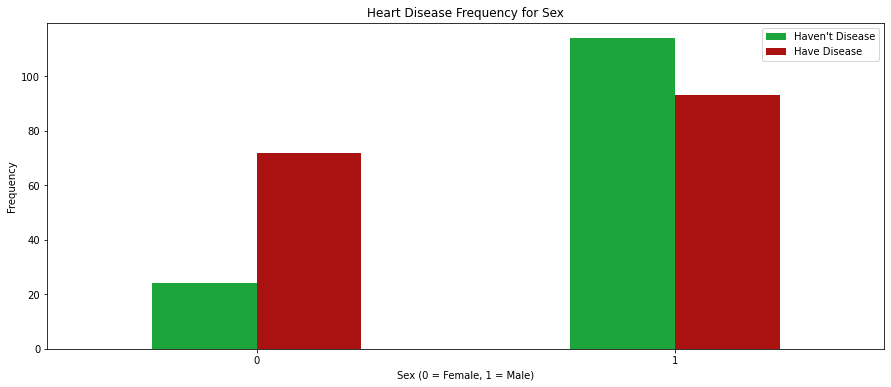

In [23]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

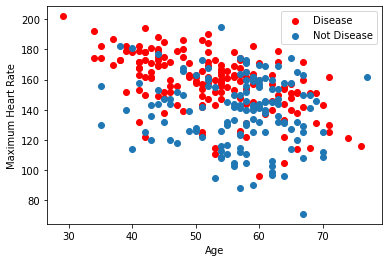

In [24]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [32]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [33]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
a = pd.get_dummies(df['sex'], prefix = "sex")
b = pd.get_dummies(df['cp'], prefix = "cp")
c = pd.get_dummies(df['fbs'], prefix = "fbs")
d = pd.get_dummies(df['restecg'], prefix = "restecg")
e = pd.get_dummies(df['exang'], prefix = "exang")
f = pd.get_dummies(df['slope'], prefix = "slope")
g = pd.get_dummies(df['thal'], prefix = "thal")
h = pd.get_dummies(df['target'], prefix = "target")

In [34]:
#Data preprocessing
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [36]:
#Standardized the continue variables
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
#Applying ML Algorithms
# 1. Logistic Regression
# 2. K-Nearest Neighbours Classifier
# 3. Support Vector machine
# 4. Decision Tree Classifier
# 5. Random Forest Classifier

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [39]:
#Split the data
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.88   0.86       0.87       0.87          0.87
recall     0.82   0.90       0.87       0.86          0.87
f1-score   0.85   0.88       0.87       0.87          0.87
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.87  0.87       0.87       0.87          0.87
recall     0.83  0.90       0.87       0.86          0.87
f1-score   0.85  0.88       0.87       0.87          0.87
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [41]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81


In [42]:
#K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.86   0.87       0.87       0.87          0.87
recall     0.85   0.89       0.87       0.87          0.87
f1-score   0.85   0.88       0.87       0.87          0.87
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.85  0.88       0.87       0.87          0.87
recall     0.85  0.88       0.87       0.87          0.87
f1-score   0.85  0.88       0.87       0.87          0.87
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [47]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Random Forest Classifier,100.00,82.42
2,K-nearest neighbors,86.79,86.81


In [43]:
#Support Vector Machine
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.94   0.93       0.93       0.93          0.93
recall     0.92   0.95       0.93       0.93          0.93
f1-score   0.93   0.94       0.93       0.93          0.93
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.86  0.90       0.88       0.88          0.88
recall     0.88  0.88       0.88       0.88          0.88
f1-score   0.87  0.89       0.88       0.88          0.88
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



In [48]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Random Forest Classifier,100.00,82.42
2,K-nearest neighbors,86.79,86.81
3,Support Vector Machine,93.40,87.91


In [44]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  1.00   1.00       1.00       1.00          1.00
recall     1.00   1.00       1.00       1.00          1.00
f1-score   1.00   1.00       1.00       1.00          1.00
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.72  0.84       0.78       0.78          0.79
recall     0.83  0.74       0.78       0.78          0.78
f1-score   0.77  0.79       0.78       0.78          0.78
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



In [49]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Random Forest Classifier,100.00,82.42
2,K-nearest neighbors,86.79,86.81
3,Support Vector Machine,93.40,87.91
4,Decision Tree Classifier,100.00,78.02


In [45]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  1.00   1.00       1.00       1.00          1.00
recall     1.00   1.00       1.00       1.00          1.00
f1-score   1.00   1.00       1.00       1.00          1.00
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.80  0.84       0.82       0.82          0.82
recall     0.80  0.84       0.82       0.82          0.82
f1-score   0.80  0.84       0.82       0.82          0.82
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [50]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Random Forest Classifier,100.00,82.42
2,K-nearest neighbors,86.79,86.81
3,Support Vector Machine,93.40,87.91
4,Decision Tree Classifier,100.00,78.02
5,Random Forest Classifier,100.00,82.42


In [51]:
#Applying Machine Learning Algorithms Using Hyperparameter Tuning
#Logistic Regression Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 85.85%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.86   0.86       0.86       0.86          0.86
recall     0.82   0.89       0.86       0.86          0.86
f1-score   0.84   0.87       0.86       0.86          0.86
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 13 102]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.85  0.86       0.86       0.86          0.86
recall     0.83  0.88       0.86       0.85          0.86
f1-score   0.84  0.87       0.86       0.86          0.86
support   41.00 50.00      91.00      91.00         91.00
_________________________________________

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished


In [52]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.85,85.71


In [54]:
#K-NN Hyperparameter Tuning
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


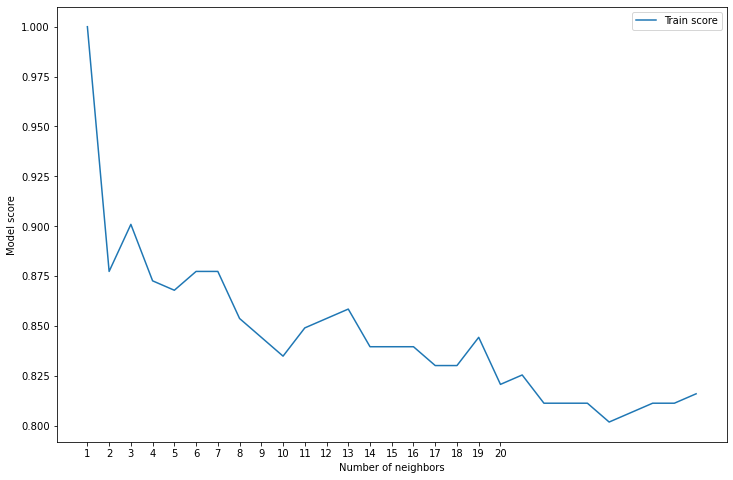

In [55]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.13%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.84   0.80       0.81       0.82          0.81
recall     0.73   0.88       0.81       0.81          0.81
f1-score   0.78   0.83       0.81       0.81          0.81
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 71  26]
 [ 14 101]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.89  0.87       0.88       0.88          0.88
recall     0.83  0.92       0.88       0.87          0.88
f1-score   0.86  0.89       0.88       0.88          0.88
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 4 46]]



In [57]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.85,85.71
1,Tuned K-nearest neighbors,81.13,87.91


In [58]:
#SVM Hyperparameter Tuning
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.3s


Best params: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.88   0.87       0.88       0.88          0.88
recall     0.85   0.90       0.88       0.87          0.88
f1-score   0.86   0.89       0.88       0.88          0.88
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.85  0.85       0.85       0.85          0.85
recall     0.80  0.88       0.85       0.84          0.85
f1-score   0.83  0.86       0.85       0.84          0.85
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confus

[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    1.3s finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.85,85.71
1,Tuned K-nearest neighbors,81.13,87.91
2,Tuned Support Vector Machine,87.74,84.62


In [60]:
#Decision Tree Hyperparameter Tuning
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3298 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 9298 tasks      | elapsed:   11.6s


Best_params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 85.85%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.87   0.85       0.86       0.86          0.86
recall     0.81   0.90       0.86       0.86          0.86
f1-score   0.84   0.87       0.86       0.86          0.86
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [ 12 103]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.80  0.87       0.84       0.83          0.84
recall     0.85  0.82       0.84       0.84          0.84
f1-score   0.82  0.85       0.84       0.83          0.84
support   41.00 50.00      91.00      91.00   

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   15.8s finished


In [61]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.85,85.71
1,Tuned K-nearest neighbors,81.13,87.91
2,Tuned Support Vector Machine,87.74,84.62
3,Tuned Decision Tree Classifier,85.85,83.52


In [63]:
#Random Forest Hyperparameter Tuning
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}
Train Result:
Accuracy Score: 91.98%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
precision  0.93   0.92       0.92       0.92          0.92
recall     0.90   0.94       0.92       0.92          0.92
f1-score   0.91   0.93       0.92       0.92          0.92
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 87  10]
 [  7 108]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
precision  0.82  0.84       0.84       0.83          0.83
recall     0.80  0.86       0.84       0.83          0.84
f1-score   0.81  0.85       0.84       0.83          0.83
support   41.00 50.

In [64]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.85,85.71
1,Tuned K-nearest neighbors,81.13,87.91
2,Tuned Support Vector Machine,87.74,84.62
3,Tuned Decision Tree Classifier,85.85,83.52
4,Tuned Random Forest Classifier,91.98,83.52


In [65]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Random Forest Classifier,100.00,82.42
2,K-nearest neighbors,86.79,86.81
3,Support Vector Machine,93.40,87.91
4,Decision Tree Classifier,100.00,78.02
5,Random Forest Classifier,100.00,82.42
